### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly as py
from mpl_toolkits.mplot3d import Axes3D

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
df = pd.read_csv('data/coupons.csv')

In [8]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
df.describe()
#df.shape
# there are 12600 records.  The avg temperature is 63, a bit on the low side.

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()
# Result: The following are numbers: tempreature, has_children, toCoupons, and Y.  No data column has null.  Good.  It also shows some useful columns may need to be turned into number, like age


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<Figure size 5000x1000 with 0 Axes>

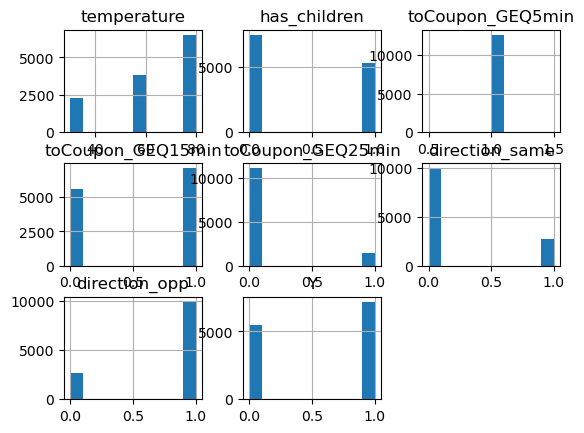

In [12]:
plt.figure(figsize=(50,10))
df.hist()
plt.title("Histogram of number factors")
plt.show()
# a summary of histogram.  It shows it may be difficult to get correlation.  We are "reading tea leafs".

In [13]:
#sns.pairplot(df[['Y','has_children','temperature','expiration','gender','age','toCoupon_GEQ15min','toCoupon_GEQ25min']])
#does not seem to show any obvious correlation.

In [14]:
df.iloc[2]
# examine some typical record.  It looks like income, time and expiration needs to be turned into number columns

destination                      No Urgent Place
passanger                              Friend(s)
weather                                    Sunny
temperature                                   80
time                                        10AM
coupon                     Carry out & Take away
expiration                                    2h
gender                                    Female
age                                           21
maritalStatus                  Unmarried partner
has_children                                   1
education               Some college - no degree
occupation                            Unemployed
income                           $37500 - $49999
car                                          NaN
Bar                                        never
CoffeeHouse                                never
CarryAway                                    NaN
RestaurantLessThan20                         4~8
Restaurant20To50                             1~3
toCoupon_GEQ5min    

In [15]:
df.iloc[:,4]
#most likely I need to do a translation

0         2PM
1        10AM
2        10AM
3         2PM
4         2PM
         ... 
12679     6PM
12680     7AM
12681     7AM
12682     7AM
12683     7AM
Name: time, Length: 12684, dtype: object

In [16]:
df.iloc[:,8].sample(20)
#most likely I will take first two numbers

6755         21
6831         26
9072         26
1114         41
6661         26
6631         26
9750         26
9110         21
2841     50plus
3401     50plus
3471         41
2924         31
11846        26
7045         21
9523         31
6202         31
1929         31
2758     50plus
8545         36
2117         21
Name: age, dtype: object

In [17]:
df.iloc[:,12].sample(20)
#most likely I will take first two numbers

8202            Installation Maintenance & Repair
5832     Arts Design Entertainment Sports & Media
595               Office & Administrative Support
8876                           Healthcare Support
12476                             Sales & Related
10397    Arts Design Entertainment Sports & Media
1822                                      Retired
2134                 Life Physical Social Science
3936                      Computer & Mathematical
11687                                  Management
9029                                      Student
10810                                       Legal
3348                         Business & Financial
7773                                   Unemployed
2521                                   Management
2764                   Education&Training&Library
3814                   Education&Training&Library
7732                              Sales & Related
4378                                      Student
613                                       Student


In [18]:
df.iloc[:,13].sample(20)
#It will be interesting to get them into a number

4351     Less than $12500
8835      $100000 or More
10819     $75000 - $87499
1648      $37500 - $49999
3205      $75000 - $87499
11598     $25000 - $37499
5498      $12500 - $24999
5931     Less than $12500
5833      $37500 - $49999
735       $37500 - $49999
4848      $12500 - $24999
9999      $12500 - $24999
7749      $50000 - $62499
10249    Less than $12500
9788      $12500 - $24999
12175     $37500 - $49999
1627      $37500 - $49999
12576     $12500 - $24999
7479      $50000 - $62499
2001      $50000 - $62499
Name: income, dtype: object

3. Decide what to do about your missing data -- drop, replace, other...

In [20]:
# I will need to turn some columns into numbers, and explore the relation.  However, I don't know if there is really a signal, since the amount of discount is now in the database


4. What proportion of the total observations chose to accept the coupon?



In [22]:
len(df.query('Y==1'))

7210

In [23]:
df.query('Y==1').shape[0]/len(df)
#56.8% accepted

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon', ylabel='Y'>

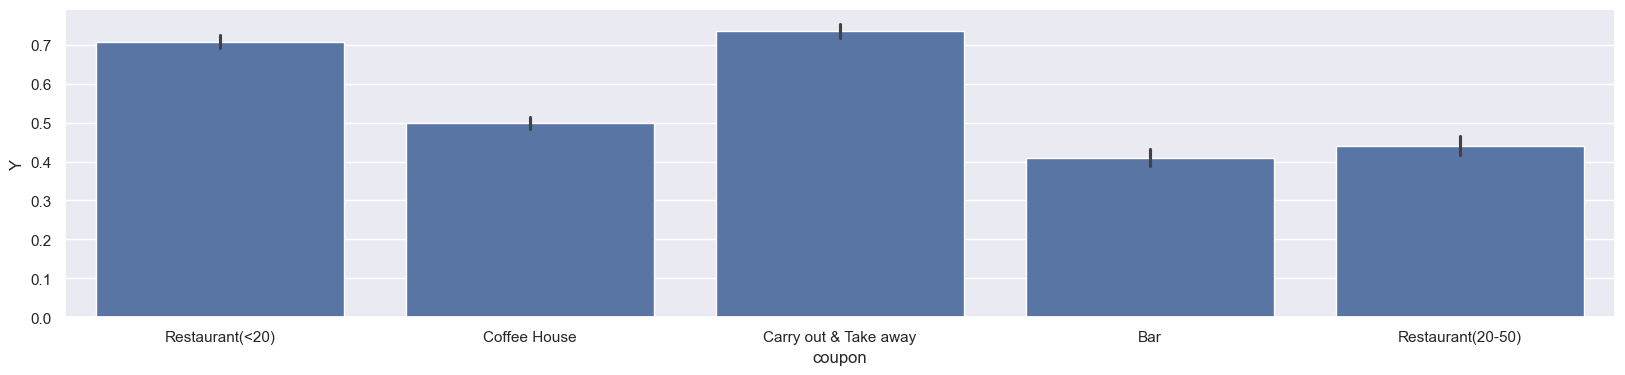

In [25]:
sns.set(rc={"figure.figsize":(20, 4)}) #width=3, #height=4
sns.barplot(data=df,x='coupon',y='Y')

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

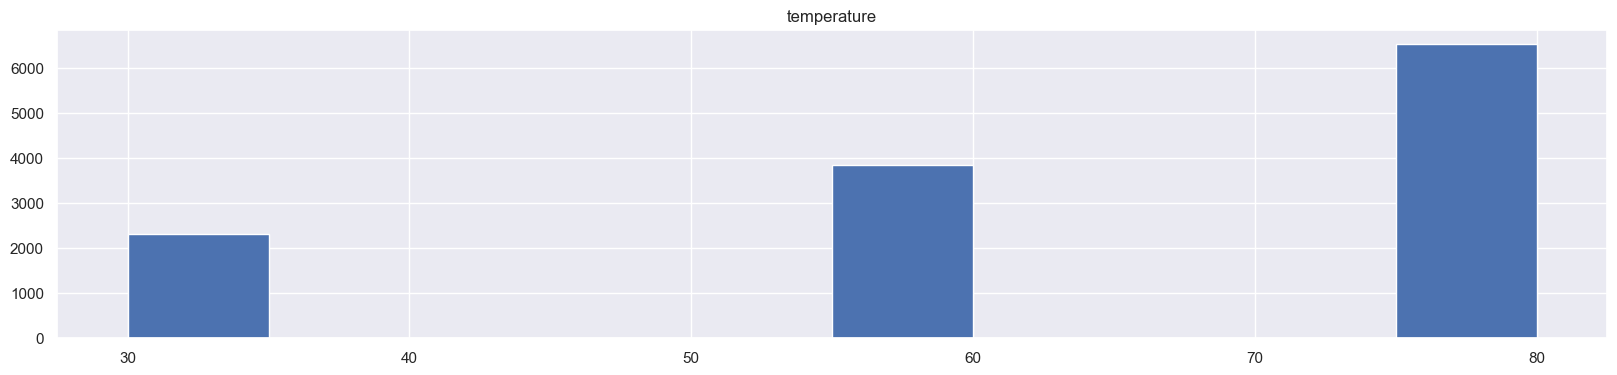

In [27]:
df.hist('temperature')
#histgram of temperature in general

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [29]:
df.iloc[:,15].sample(20)

10333    never
5413     never
11413      1~3
8371     less1
10962    never
1668       gt8
4277       1~3
6237       4~8
3096     never
7638     never
8400     never
11835    less1
2697     less1
9548     less1
6890       1~3
3997     less1
1725     never
12197      4~8
8385     less1
6995       1~3
Name: Bar, dtype: object

In [30]:
#dfbar=df.loc[df["Bar"]!="never"]
dfbar=df.loc[df["coupon"]=="Bar"]
dfbar.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,2017.000000,2017.000000,2017.0,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,57.590481,0.433813,1.0,0.663361,0.252851,0.209222,0.790778,0.410015
std,17.950408,0.495723,0.0,0.472677,0.434754,0.406854,0.406854,0.491958
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
dfbar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
338,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,less1,1~3,1~3,less1,1,1,1,0,1,1
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0
11890,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,4~8,1~3,less1,1,1,0,0,1,1
2729,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,1~3,1~3,4~8,1~3,1,1,1,0,1,0
1976,Home,Alone,Sunny,55,6PM,Bar,1d,Male,36,Married partner,...,1~3,1~3,4~8,less1,1,0,0,1,0,1


In [32]:
dfbar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   13 non-null     object
 15  Bar                   1996 non-null   obje

In [33]:
dfbar.shape[0]/df.shape[0]

0.15901923683380637

2. What proportion of bar coupons were accepted?


In [35]:
dfbar.query("Y==1").shape
#there are 4443 records that related to Bar coupon

(827, 26)

In [36]:
dfbar.query('Y==1').shape[0]/len(dfbar)
#41 percent Bar coupons were used

0.41001487357461575

In [37]:
dfbar.query('Y==1').shape[0]/len(df)
#bar coupon use constitutes 5 percent of all coupon use

0.065200252286345

In [38]:
print(dfbar['age'].unique())
print(dfbar['Bar'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['never' 'less1' '1~3' 'gt8' nan '4~8']


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [40]:
pd.set_option('display.max_columns', None) 
dfbar.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11408,Work,Alone,Snowy,30,7AM,Bar,1d,Male,50plus,Married partner,0,Graduate degree (Masters or Doctorate),Retired,$50000 - $62499,NaN,less1,less1,less1,less1,less1,1,1,1,0,1,1
1189,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Married partner,1,Bachelors degree,Computer & Mathematical,$100000 or More,NaN,1~3,gt8,4~8,gt8,4~8,1,1,1,0,1,1
5492,Home,Alone,Sunny,80,10PM,Bar,1d,Female,41,Single,1,Some college - no degree,Business & Financial,$12500 - $24999,NaN,never,less1,less1,less1,never,1,1,0,1,0,0
11254,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,1,Bachelors degree,Unemployed,$87500 - $99999,NaN,less1,less1,less1,less1,less1,1,1,1,0,1,0
11733,Work,Alone,Snowy,30,7AM,Bar,1d,Female,21,Single,0,Bachelors degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,gt8,less1,gt8,4~8,never,1,1,1,0,1,1


In [41]:
dfbar.query('Y==1' and ('Bar=="less1" or Bar=="1~3"')).sample(4)
dfbar.query('Y==1' and ('Bar=="less1" or Bar=="1~3"')).shape[0]

967

In [42]:
dfbar.query('Y==1' and ('Bar=="gt8" or Bar=="4~8"')).sample(4)
dfbar.query('Y==1' and ('Bar=="gt8" or Bar=="4~8"')).shape[0]

199

In [43]:
#acceptance rate for people to go to bar 3 times or less
print(dfbar.query('Y==1' and ('Bar=="less1" or Bar=="1~3"')).shape[0]/len(dfbar))
#acceptance rate for people who go to bar more heavily
print(dfbar.query('Y==1' and ('Bar=="gt8" or Bar=="4~8"')).shape[0]/len(dfbar))

0.47942488844819037
0.09866137828458106


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [45]:
dfbar.query(('Y==1') and ('Bar!="less1"') and ('age!="21"' or 'age!="below21"')).sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3176,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,50plus,Married partner,1,Some college - no degree,Retired,$87500 - $99999,NaN,never,never,1~3,1~3,less1,1,1,0,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,1,Bachelors degree,Legal,$100000 or More,crossover,never,1~3,1~3,1~3,less1,1,1,0,0,1,0
4064,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,36,Married partner,1,Some college - no degree,Computer & Mathematical,$25000 - $37499,NaN,never,never,1~3,less1,never,1,0,0,0,1,0


In [46]:
dfbar.query('Y==1').sample(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10148,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Male,31,Married partner,0,Bachelors degree,Architecture & Engineering,$75000 - $87499,NaN,less1,never,1~3,1~3,1~3,1,0,0,0,1,1
1217,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,below21,Single,0,Some college - no degree,Student,$62500 - $74999,NaN,never,1~3,1~3,never,1~3,1,0,0,0,1,1
3156,Home,Alone,Sunny,55,6PM,Bar,1d,Male,41,Married partner,1,Graduate degree (Masters or Doctorate),Management,$62500 - $74999,NaN,1~3,1~3,1~3,4~8,less1,1,0,0,1,0,1


In [47]:
dfbar.query('Y==1 and Bar!="less1" and age!="21" and age!="below21"').shape[0]

397

In [48]:
#dfbar=df.loc[df["Bar"]!="never"]
print(dfbar.query('Y==1').shape[0])
len(dfbar.query('Y==1'))

827


827

In [49]:
# It appears the population of interest used coupon 397 times.  The rest of Bar coupon users used coupon 827 times.  It appears there is a small difference

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [158]:
print(dfbar['age'].unique())
print(dfbar['Bar'].unique())
print(dfbar['passanger'].unique())
print(dfbar['maritalStatus'].unique())
print(dfbar['RestaurantLessThan20'].unique())
print(dfbar['income'].unique())
print(dfbar['occupation'].unique())

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['never' 'less1' '1~3' 'gt8' nan '4~8']
['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' nan 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupatio

In [160]:
dfbar.query('Y==1 and Bar!="less1" and passanger!="kid(s)" and occupation!="Farming Fishing & Forestry"').shape[0]

574

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [54]:
dfbar.query('Y==1 and Bar!="less1" and age!="21" and age!="26" and age!="below21"').shape[0]

241

In [55]:
dfbar.query('Y==1 and Bar!="less1" and maritalStatus!="Widowed" and passanger!="Kid(s)"').shape[0]

537

In [56]:
dfbar.query('Y==1 and income!="$25000 - $37499" and income!="Less than $12500" and RestaurantLessThan20!="1~3" and RestaurantLessThan20!="less1" and RestaurantLessThan20!="never"and RestaurantLessThan20!="nan"').shape[0]

267

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [58]:
#so far, the people who use the coupone least among the three comparison groups are those who go to bars once a month and under age 30.  
#The people most likely to say yes.  People who have passengers as kids and not widowed are least likely.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I will first generate codes to make age, income become numbers.  I will use the middle range if the entry is a range.  if the entry has only upper or lower limit, I will use the limit.
## for income I will first make income low and income high.
I discovered a few new methods not mentioned.  These include count plot, and composite query.  Using my own way I turned the income to a number variable.
1.	The income is categorical, not numerical.  I created a new column called incomelow. This contains numbers which is basically average of the range.
2.	Instead of “buying a coupon”, I want to see what type of coupon is best seller.
a.	Ideally I like to find what hour has best chance.
3.	I looked at histogram of coupon types, occupation and determined the following groups has the best rate of buying a coupon (any coupon)
a.	By occupation
b.	By income level


In [61]:
dfnew=df

In [62]:
dfnew.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
10437,Home,Alone,Sunny,80,6PM,Restaurant(<20),1d,Female,21,Single,0,High School Graduate,Unemployed,Less than $12500,NaN,1~3,4~8,gt8,gt8,4~8,1,0,0,1,0,1
5726,Home,Alone,Sunny,80,6PM,Coffee House,1d,Male,21,Single,0,Some college - no degree,Student,$100000 or More,NaN,less1,1~3,1~3,1~3,less1,1,0,0,1,0,1
6178,No Urgent Place,Partner,Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,0,Some college - no degree,Sales & Related,$25000 - $37499,NaN,never,less1,less1,less1,never,1,0,0,0,1,1
8246,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Male,50plus,Married partner,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$87500 - $99999,NaN,never,4~8,1~3,4~8,less1,1,1,0,1,0,1
6109,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,21,Unmarried partner,0,Some college - no degree,Food Preparation & Serving Related,$12500 - $24999,NaN,1~3,less1,1~3,1~3,never,1,0,0,1,0,0
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
7041,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,1d,Male,21,Unmarried partner,0,High School Graduate,Sales & Related,$37500 - $49999,NaN,never,less1,4~8,4~8,less1,1,1,0,0,1,1
7080,Home,Alone,Sunny,80,6PM,Bar,2h,Male,26,Married partner,0,Associates degree,Building & Grounds Cleaning & Maintenance,$37500 - $49999,NaN,less1,less1,1~3,1~3,less1,1,0,0,1,0,0
3929,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Female,26,Single,0,Bachelors degree,Arts Design Entertainment Sports & Media,$12500 - $24999,NaN,never,never,1~3,less1,less1,1,0,0,1,0,1
9619,Work,Alone,Snowy,30,7AM,Carry out & Take away,1d,Female,21,Unmarried partner,0,Bachelors degree,Community & Social Services,$62500 - $74999,NaN,less1,never,1~3,less1,never,1,1,0,1,0,1


In [63]:
dfnew.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
dfnew.iloc[2,13]

'$37500 - $49999'

In [65]:
print(dfbar['income'].unique())

['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [66]:
#dfnew['incomelow']=dfnew['income']
def f(row):
    if row["income"] == '$75000 - $87499':
        val = 80000
    elif row["income"] == '$12500 - $24999':
        val = 20000
    elif row["income"] == '$50000 - $62499':
        val = 55000
    elif row["income"] == '$12500 - $24999':
        val = 20000
    elif row["income"] == '$37500 - $49999':
        val = 40000
    elif row["income"] == '$100000 or More':
        val = 100000
    elif row["income"] == '$87500 - $99999':
        val = 90000
    elif row["income"] == 'Less than $12500':
        val = 12500
    elif row["income"] == '$62500 - $74999':
        val = 40000
    elif row["income"] == '$25000 - $37499':
        val = 40000
    else:
        val = 999
    return val
dfnew['incomelow']=dfnew.apply(f,axis=1)

In [67]:
dfnew.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,incomelow
9791,Work,Alone,Sunny,80,7AM,Coffee House,1d,Male,31,Single,0,Some college - no degree,Office & Administrative Support,$12500 - $24999,NaN,4~8,never,gt8,4~8,never,1,0,0,1,0,0,20000
999,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,31,Married partner,1,Bachelors degree,Arts Design Entertainment Sports & Media,$25000 - $37499,NaN,never,never,1~3,never,never,1,1,0,0,1,0,40000
10234,No Urgent Place,Partner,Sunny,55,2PM,Bar,1d,Female,below21,Unmarried partner,0,High School Graduate,Student,Less than $12500,NaN,never,4~8,1~3,4~8,less1,1,0,0,0,1,0,12500
9903,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,21,Unmarried partner,0,Some college - no degree,Student,$12500 - $24999,NaN,never,less1,gt8,4~8,1~3,1,1,0,0,1,1,20000
3763,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,41,Married partner,1,Bachelors degree,Management,$62500 - $74999,NaN,1~3,4~8,4~8,4~8,1~3,1,1,0,0,1,1,40000


In [68]:
dfnew['incomelow'] = dfnew['incomelow'].astype(int)

In [69]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

so far we turned income to number

In [71]:
#which type of coupon is most popular?
dfnew.groupby('coupon').size()

coupon
Bar                      2017
Carry out & Take away    2393
Coffee House             3996
Restaurant(20-50)        1492
Restaurant(<20)          2786
dtype: int64

In [72]:
dfnew.groupby('destination').size()

destination
Home               3237
No Urgent Place    6283
Work               3164
dtype: int64

array([[<Axes: title={'center': 'incomelow'}>]], dtype=object)

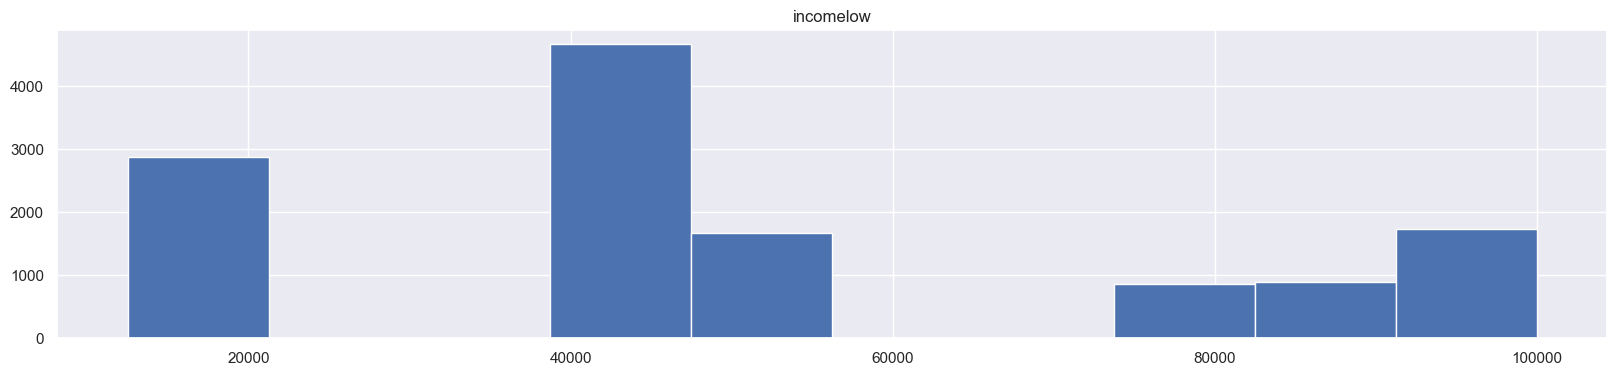

In [73]:
df.hist('incomelow')

array([[<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'has_children'}>,
        <Axes: title={'center': 'toCoupon_GEQ5min'}>],
       [<Axes: title={'center': 'toCoupon_GEQ15min'}>,
        <Axes: title={'center': 'toCoupon_GEQ25min'}>,
        <Axes: title={'center': 'direction_same'}>],
       [<Axes: title={'center': 'direction_opp'}>,
        <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'incomelow'}>]], dtype=object)

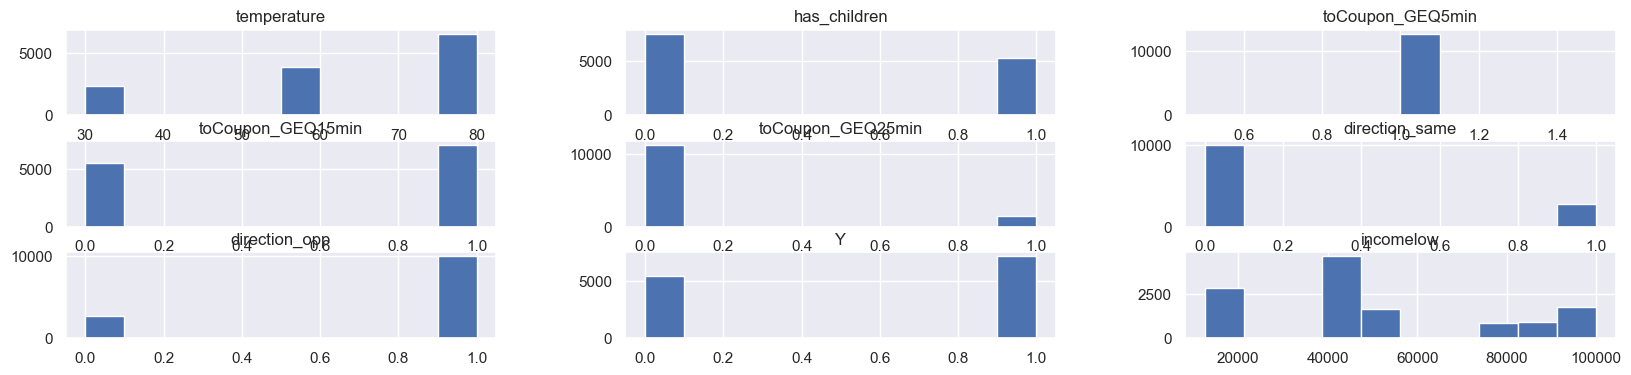

In [74]:
dfnew.hist()

In [75]:
dfbar.query('Y==1 and coupon=="Bar"').shape[0]

827

<Axes: xlabel='coupon', ylabel='Count'>

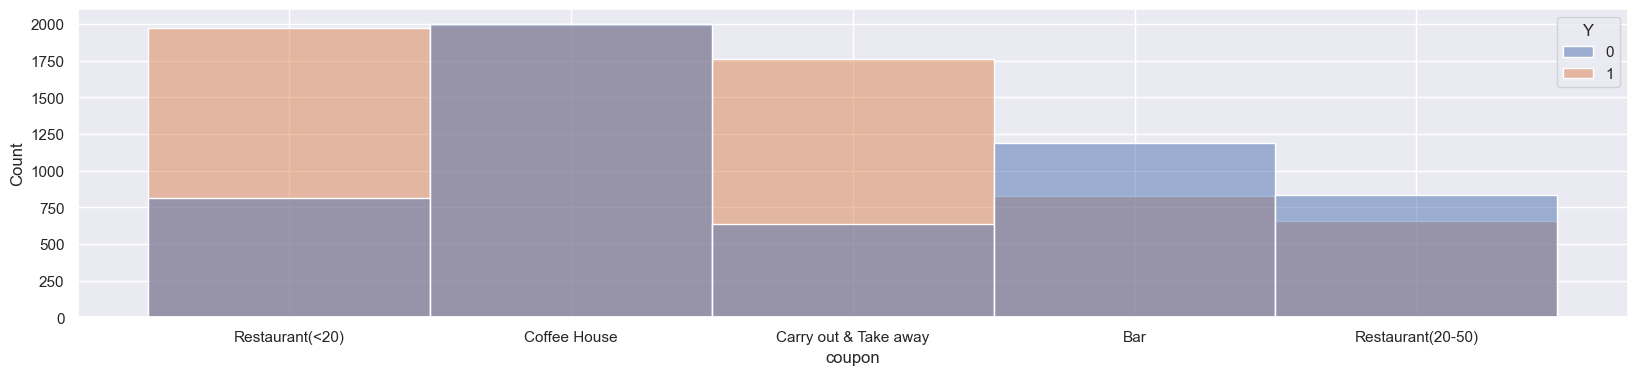

In [76]:
sns.histplot(data=dfnew,x='coupon',hue='Y')

<Axes: xlabel='coupon', ylabel='count'>

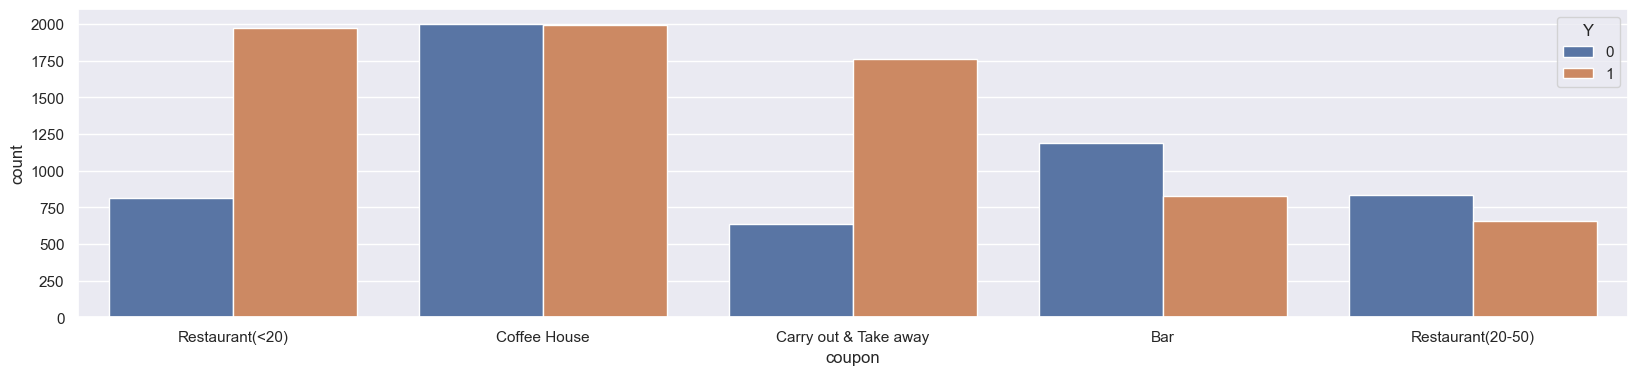

In [77]:
sns.countplot(data=dfnew,x='coupon',hue='Y')

<Axes: xlabel='destination', ylabel='count'>

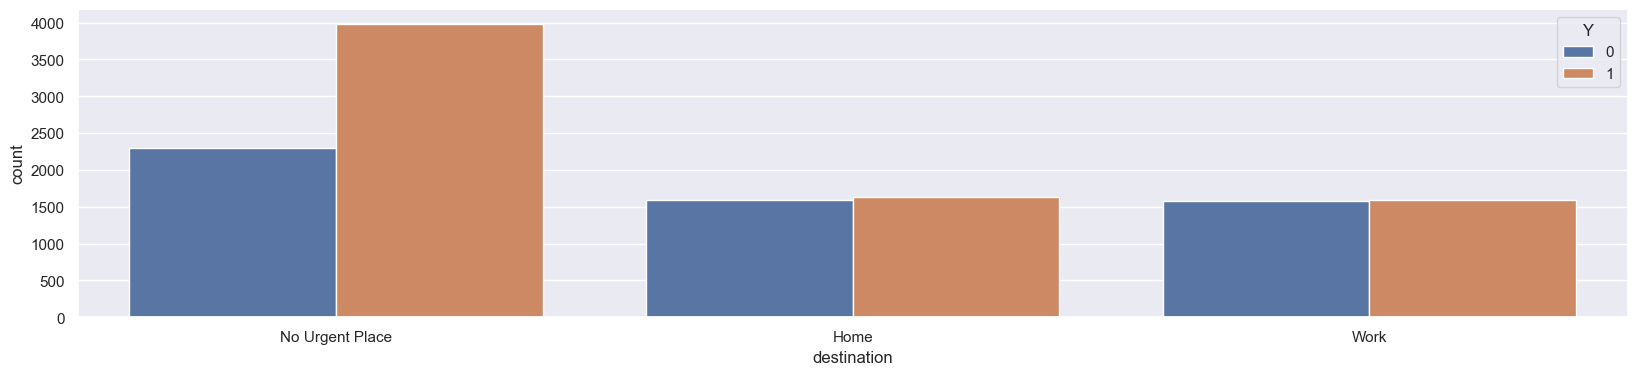

In [78]:
sns.countplot(data=df,x='destination',hue='Y')

<Axes: xlabel='education', ylabel='count'>

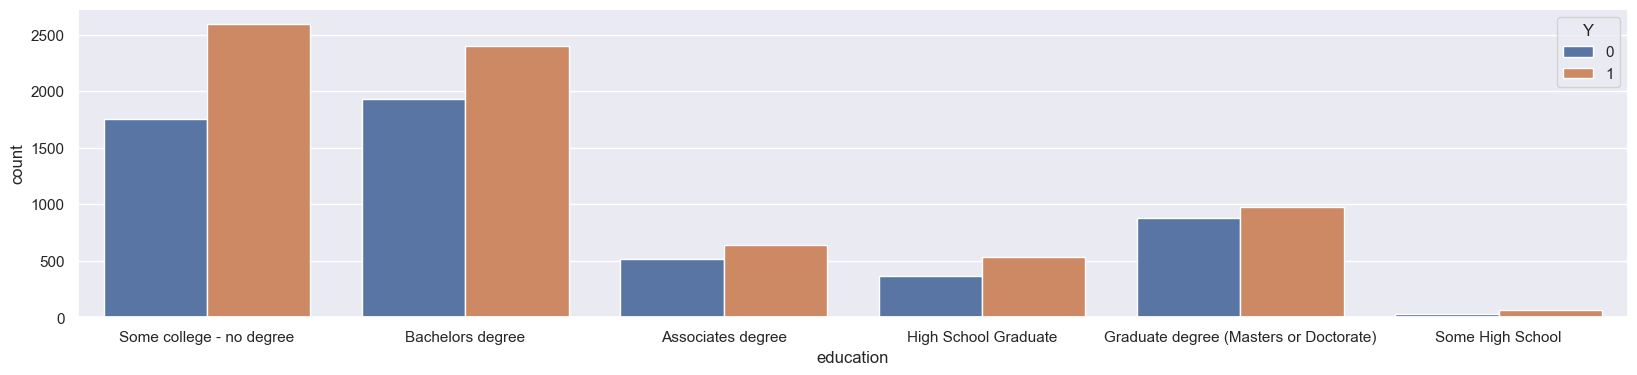

In [79]:
sns.countplot(data=df,x='education',hue='Y')

C:\Users\12242\AppData\Local\Temp\ipykernel_22392\1900896890.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45)


[Text(0, 0, 'Unemployed'),
 Text(1, 0, 'Architecture & Engineering'),
 Text(2, 0, 'Student'),
 Text(3, 0, 'Education&Training&Library'),
 Text(4, 0, 'Healthcare Support'),
 Text(5, 0, 'Healthcare Practitioners & Technical'),
 Text(6, 0, 'Sales & Related'),
 Text(7, 0, 'Management'),
 Text(8, 0, 'Arts Design Entertainment Sports & Media'),
 Text(9, 0, 'Computer & Mathematical'),
 Text(10, 0, 'Life Physical Social Science'),
 Text(11, 0, 'Personal Care & Service'),
 Text(12, 0, 'Community & Social Services'),
 Text(13, 0, 'Office & Administrative Support'),
 Text(14, 0, 'Construction & Extraction'),
 Text(15, 0, 'Legal'),
 Text(16, 0, 'Retired'),
 Text(17, 0, 'Installation Maintenance & Repair'),
 Text(18, 0, 'Transportation & Material Moving'),
 Text(19, 0, 'Business & Financial'),
 Text(20, 0, 'Protective Service'),
 Text(21, 0, 'Food Preparation & Serving Related'),
 Text(22, 0, 'Production Occupations'),
 Text(23, 0, 'Building & Grounds Cleaning & Maintenance'),
 Text(24, 0, 'Farming

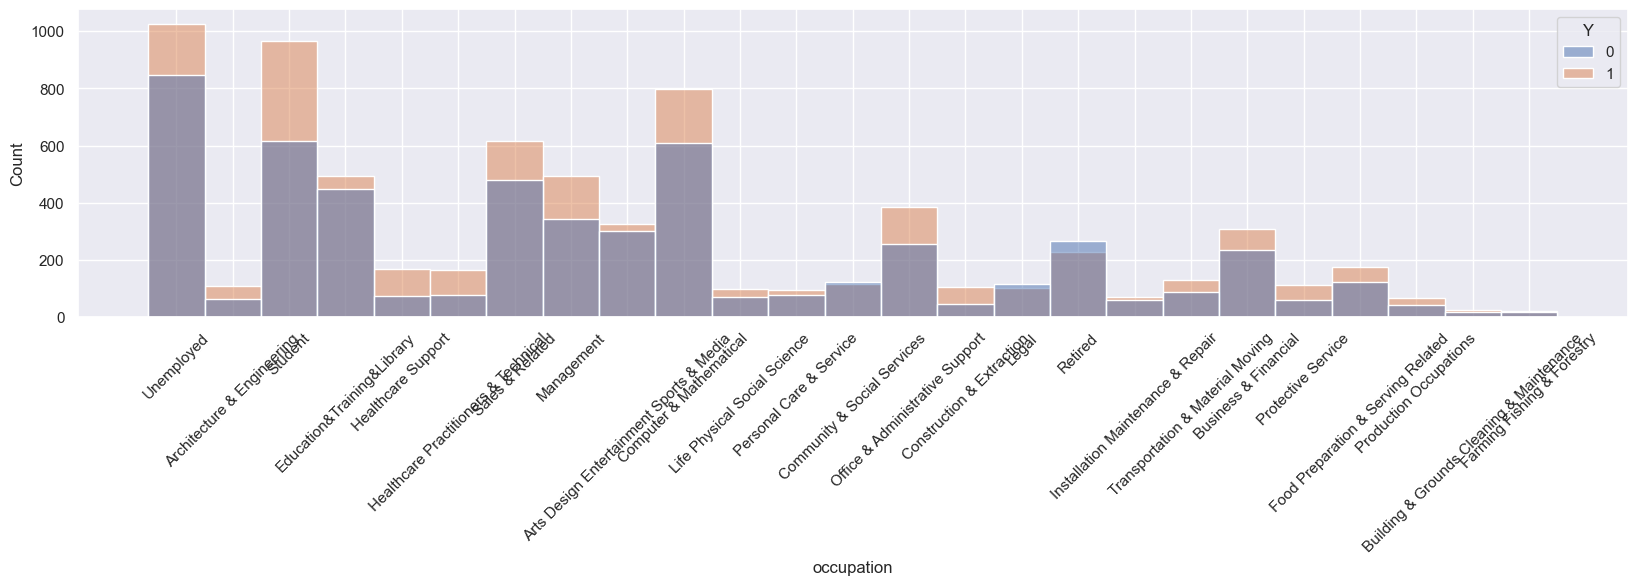

In [80]:
myplot = sns.histplot(data=df,x='occupation',hue='Y')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=45)

<Axes: xlabel='maritalStatus', ylabel='count'>

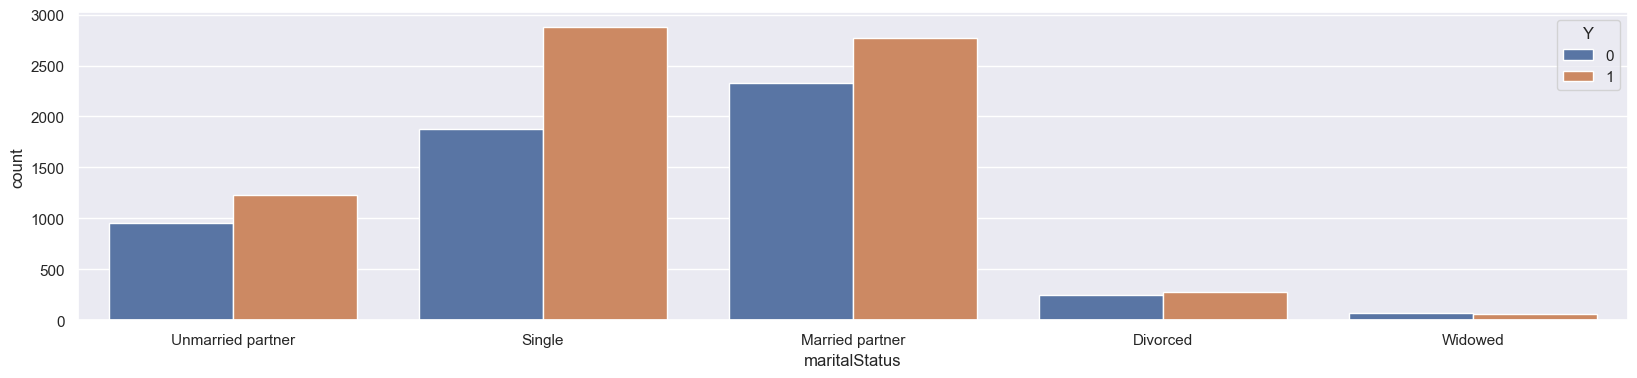

In [81]:
sns.countplot(data=df,x="maritalStatus",hue='Y')

<Axes: xlabel='maritalStatus', ylabel='Count'>

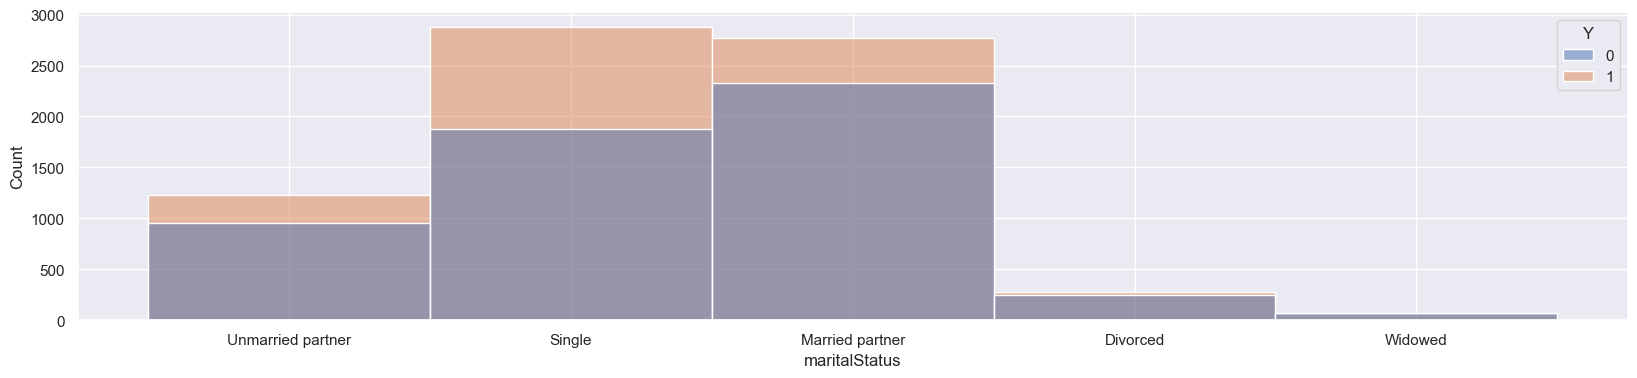

In [82]:
sns.histplot(data=df,x="maritalStatus",hue='Y')

<Axes: xlabel='incomelow', ylabel='count'>

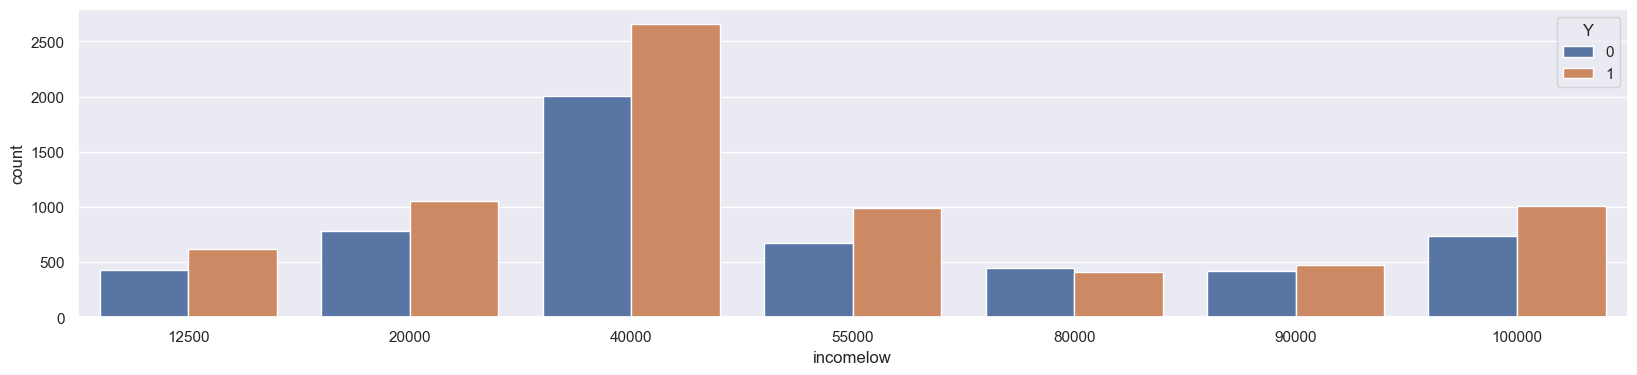

In [83]:
sns.countplot(data=df,x="incomelow",hue='Y')

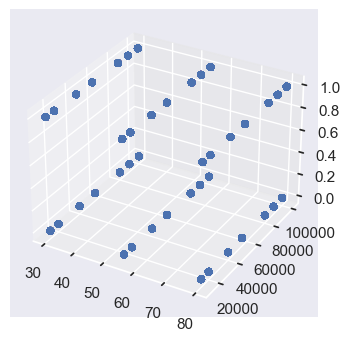

In [84]:
x=dfnew['temperature']
y=dfnew['incomelow']
z=dfnew['Y']
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z)

array([[<Axes: title={'center': '12500'}>,
        <Axes: title={'center': '20000'}>,
        <Axes: title={'center': '40000'}>],
       [<Axes: title={'center': '55000'}>,
        <Axes: title={'center': '80000'}>,
        <Axes: title={'center': '90000'}>],
       [<Axes: title={'center': '100000'}>, <Axes: >, <Axes: >]],
      dtype=object)

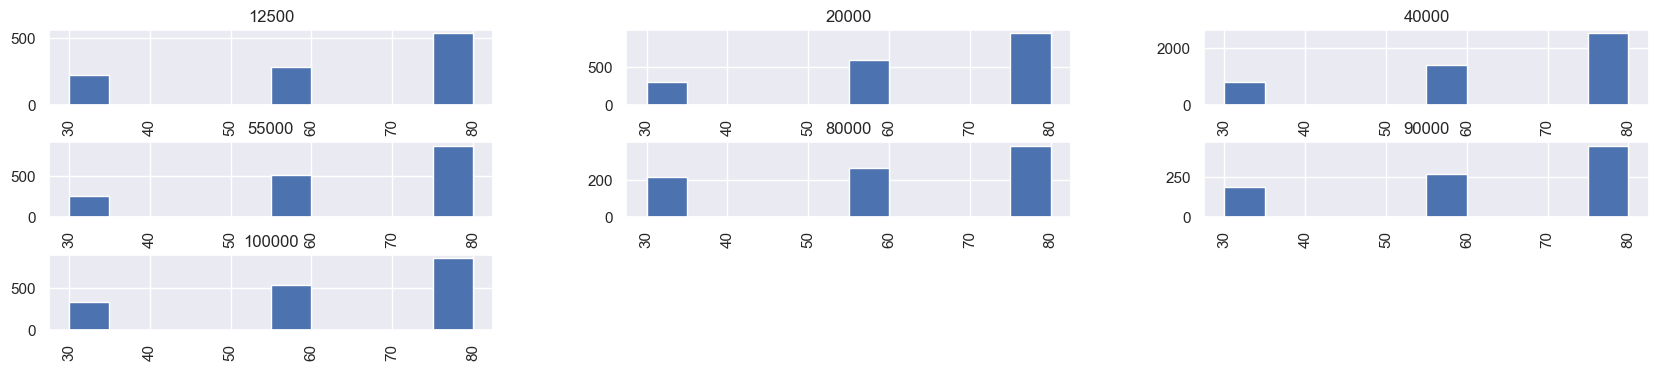

In [85]:
dfnew.hist('temperature','incomelow','Y')

array([[<Axes: title={'center': 'Divorced'}>,
        <Axes: title={'center': 'Married partner'}>],
       [<Axes: title={'center': 'Single'}>,
        <Axes: title={'center': 'Unmarried partner'}>],
       [<Axes: title={'center': 'Widowed'}>, <Axes: >]], dtype=object)

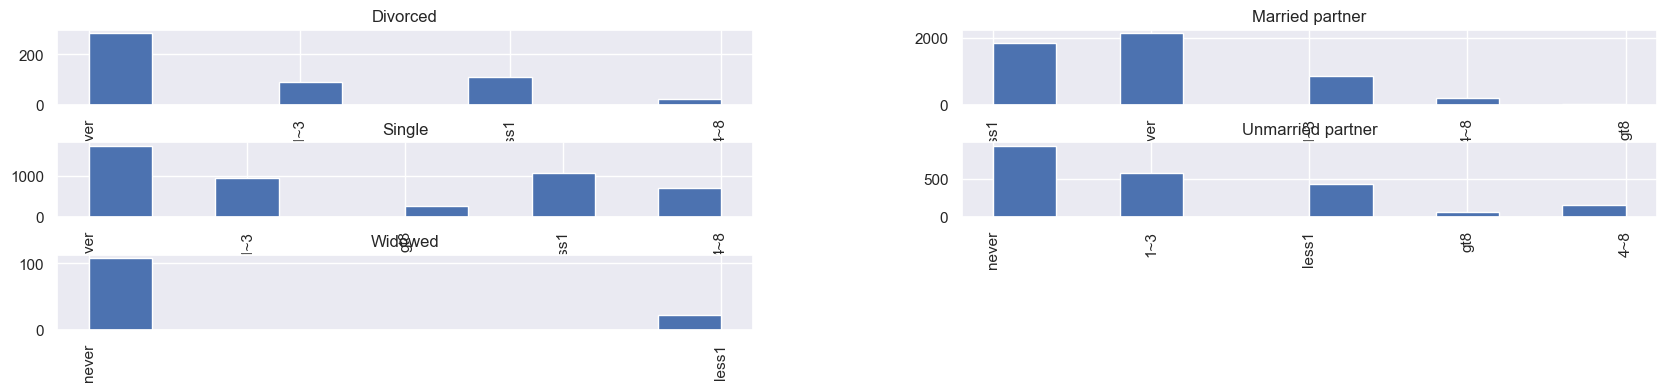

In [86]:
dfnew.hist('Bar','maritalStatus','Y')